Семинар - Pandas

Pandas — пакет для статистической обработки данных, по функциональности близкий к SQL и R. Включает в себя функциональность работы с базами данных и таблицами Excel.

Как импортировать pandas:

In [1]:
import pandas as pd # скачать можно через pip: pip install pandas
import numpy as np

Series: Одномерный набор данных. Отсутствующий данные записываются как np.nan. При вычислении среднего и других операций соответствующие функции не учитывают отсутствующие значения.

In [ ]:
l = [1, 3, 5, np.nan, 6, 8]
s = pd.Series(l)
s

,0
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


In [ ]:
s2 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])  # Кастомные индексы
s3 = pd.Series({'a': 1, 'b': 2, 'c': 3})  # Из словаря

print("Series с кастомным индексом:")
print(s2)
print("\nОбращение по индексу:", s2['b'])

Series с кастомным индексом:
a    10
b    20
c    30
dtype: int64

Обращение по индексу: 20


Отсутствующие значения:

In [ ]:
s = pd.Series([1, 2, np.nan, 4, np.nan, 6])
print("\n=== Работа с пропусками ===")
print("Исходные данные:", s.values)
print("Обнаружение пропусков:", s.isna().values)
print("Без пропусков:", s.dropna().values)
print("Заполненные нулями:", s.fillna(0).values)


=== Работа с пропусками ===
Исходные данные: [ 1.  2. nan  4. nan  6.]
Обнаружение пропусков: [False False  True False  True False]
Без пропусков: [1. 2. 4. 6.]
Заполненные нулями: [1. 2. 0. 4. 0. 6.]


Полезные штучки:

In [ ]:
s.describe()

,0
count,4.000000
mean,3.250000
std,2.217356
min,1.000000
25%,1.750000
50%,3.000000
75%,4.500000
max,6.000000


In [ ]:
s[2]

np.float64(nan)

In [ ]:
s[2] = 7
s

,0
0,1.0
1,2.0
2,7.0
3,4.0
4,NaN
5,6.0


In [ ]:
s[2:5]

,0
2,7.0
3,4.0
4,NaN


In [ ]:
s1 = s[1:]
s1

,0
1,2.0
2,7.0
3,4.0
4,NaN
5,6.0


In [ ]:
s2 = s[:-1]
s2

,0
0,1.0
1,2.0
2,7.0
3,4.0
4,NaN


In [ ]:
s1 + s2

,0
0,NaN
1,4.0
2,14.0
3,8.0
4,NaN
5,NaN


Сумма идёт по индексам, поэтому если в одном массиве нету значения с данным индексом, то после суммы этот индекс будет NaN

pandas основан на numpy, и не удивительно, что функции из него применяются на струтурах из pandas

In [ ]:
np.exp(s)

,0
0,2.718282
1,7.389056
2,1096.633158
3,54.598150
4,NaN
5,403.428793


операции сравнения возвращают були

In [ ]:
s > 3

,0
0,False
1,False
2,True
3,True
4,False
5,True


и, вот к примеру создадим новый series с помощью старого и bool значения:

In [ ]:
s[s > 3]

,0
2,7.0
3,4.0
5,6.0


DataFrame - это двумерная таблица, где каждый столбец представляет собой Series. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [ ]:

import scipy.stats as sps # для генерации случчайных значений
d = {'one': pd.Series(range(6), index=list('abcdef')),
     'two': pd.Series(range(7), index=list('abcdefg')),
     'three': pd.Series(sps.norm.rvs(size=7), index=list('abcdefg'))}
df = pd.DataFrame(d)
df



,one,two,three
a,0.0,0,0.050100
b,1.0,1,-0.816368
c,2.0,2,0.329230
d,3.0,3,2.141394
e,4.0,4,-0.869036
f,5.0,5,0.306398
g,NaN,6,0.377811


можем узнать типы у элементов таблицы

In [ ]:
df.dtypes

,0
one,float64
two,int64
three,float64


df.head и df.tail(count) используются для просмотра данных в начале и конце датафрейма соответственно

In [ ]:

df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)),
                                    dtype='float32'),
                     'D': np.array([3] * 4,
                                   dtype='int32'),
                     'E': pd.Categorical(["test", "train",
                                          "test", "train"]),
                     'F': 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


С dataframe можно работать точно так же как и Series

In [ ]:
df.describe()

,one,two,three
count,6.000000,7.000000,7.000000
mean,2.500000,3.000000,0.217075
std,1.870829,2.160247,1.002074
min,0.000000,0.000000,-0.869036
25%,1.250000,1.500000,-0.383134
50%,2.500000,3.000000,0.306398
75%,3.750000,4.500000,0.353520
max,5.000000,6.000000,2.141394


In [ ]:
print("\n=== DataFrame: Создание ===")
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 28],
    'Salary': [50000, 70000, 80000, 60000],
    'Department': ['IT', 'HR', 'IT', 'Finance']
})

print("DataFrame:")
print(df)
print("\nИнформация о данных:")
df.info()


=== DataFrame: Создание ===
DataFrame:
      Name  Age  Salary Department
0    Alice   25   50000         IT
1      Bob   30   70000         HR
2  Charlie   35   80000         IT
3    David   28   60000    Finance

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        4 non-null      object
 1   Age         4 non-null      int64 
 2   Salary      4 non-null      int64 
 3   Department  4 non-null      object
dtypes: int64(2), object(2)
memory usage: 260.0+ bytes


In [ ]:
print("\n=== Различные способы индексации ===")

# 1. Простой выбор столбца - возвращает Series
names = df['Name']
print("Тип при выборе одного столбца:", type(names))

# 2. Выбор нескольких столбцов - возвращает DataFrame
name_salary = df[['Name', 'Salary']]
print("Тип при выборе нескольких столбцов:", type(name_salary))

# 3. Булева индексация - фильтрация по условию
experienced = df[df['Age'] > 28]
print("\nСотрудники старше 28 лет:")
print(experienced)

# 4. loc - выбор по меткам (осмысленным индексам)
print("\nМетод loc (по меткам):")
print("Имя первого сотрудника:", df.loc[0, 'Name'])

# 5. iloc - выбор по позициям (как в обычных массивах)
print("Метод iloc (по позициям):")
print("Возраст первого сотрудника:", df.iloc[0, 1])


=== Различные способы индексации ===
Тип при выборе одного столбца: <class 'pandas.core.series.Series'>
Тип при выборе нескольких столбцов: <class 'pandas.core.frame.DataFrame'>

Сотрудники старше 28 лет:
      Name  Age  Salary Department
1      Bob   30   70000         HR
2  Charlie   35   80000         IT

Метод loc (по меткам):
Имя первого сотрудника: Alice
Метод iloc (по позициям):
Возраст первого сотрудника: 25


In [ ]:
print("\n=== Сортировка и агрегация ===")

# Сортировка по возрасту (по убыванию)
sorted_by_age = df.sort_values('Age', ascending=False)
print("Сортировка по возрасту:")
print(sorted_by_age)

# Базовые статистики - быстрый обзор данных
print("\nОписательные статистики:")
print(df.describe())

# Группировка - основа аналитики
print("\nСредняя зарплата по отделам:")
dept_salaries = df.groupby('Department')['Salary'].mean()
print(dept_salaries)


=== Сортировка и агрегация ===
Сортировка по возрасту:
      Name  Age  Salary Department
2  Charlie   35   80000         IT
1      Bob   30   70000         HR
3    David   28   60000    Finance
0    Alice   25   50000         IT

Описательные статистики:
             Age        Salary
count   4.000000      4.000000
mean   29.500000  65000.000000
std     4.203173  12909.944487
min    25.000000  50000.000000
25%    27.250000  57500.000000
50%    29.000000  65000.000000
75%    31.250000  72500.000000
max    35.000000  80000.000000

Средняя зарплата по отделам:
Department
Finance    60000.0
HR         70000.0
IT         65000.0
Name: Salary, dtype: float64


In [ ]:
print("\n=== Сортировка и агрегация ===")

# Сортировка по возрасту (по убыванию)
sorted_by_age = df.sort_values('Age', ascending=False)
print("Сортировка по возрасту:")
print(sorted_by_age)

# Базовые статистики - быстрый обзор данных
print("\nОписательные статистики:")
print(df.describe())

# Группировка - основа аналитики
print("\nСредняя зарплата по отделам:")
dept_salaries = df.groupby('Department')['Salary'].mean()
print(dept_salaries)


=== Сортировка и агрегация ===
Сортировка по возрасту:
      Name  Age  Salary Department
2  Charlie   35   80000         IT
1      Bob   30   70000         HR
3    David   28   60000    Finance
0    Alice   25   50000         IT

Описательные статистики:
             Age        Salary
count   4.000000      4.000000
mean   29.500000  65000.000000
std     4.203173  12909.944487
min    25.000000  50000.000000
25%    27.250000  57500.000000
50%    29.000000  65000.000000
75%    31.250000  72500.000000
max    35.000000  80000.000000

Средняя зарплата по отделам:
Department
Finance    60000.0
HR         70000.0
IT         65000.0
Name: Salary, dtype: float64


In [ ]:
print("\n=== Продвинутая группировка ===")

# Сложная агрегация - разные функции для разных столбцов
department_stats = df.groupby('Department').agg({
    'Salary': ['mean', 'min', 'max', 'std'],  # 4 статистики для зарплат
    'Age': ['mean', 'count'],  })               # 2 статистики для возраста

print("Детальная статистика по отделам:")
print(department_stats)


=== Продвинутая группировка ===
Детальная статистика по отделам:
             Salary                               Age      
               mean    min    max           std  mean count
Department                                                 
Finance     60000.0  60000  60000           NaN  28.0     1
HR          70000.0  70000  70000           NaN  30.0     1
IT          65000.0  50000  80000  21213.203436  30.0     2


Давайте попрактикуемся на каком нибудь csv файле:

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [10]:
coins = pd.read_csv('./coins.csv', index_col=0)

Посмотрим что получилось

In [11]:
coins

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

In [14]:
coins[coins.symbol == "BTC"]

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.000000e+00,1.500520e+09
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.000000e+00,1.491160e+09
2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.000000e+00,1.597780e+09
2013-05-01,139.00,55176.0,1.206825e+08,83564.0,BTC,Bitcoin,139.00,139.89,107.72,116.99,0.000000e+00,1.542820e+09
2013-05-02,116.38,55295.0,9.337533e+07,81920.0,BTC,Bitcoin,116.38,125.60,92.28,105.21,0.000000e+00,1.292190e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-02,7536.72,174345.0,4.151723e+09,521910.0,BTC,Bitcoin,7536.72,7695.83,7497.26,7643.45,4.939300e+09,1.286450e+11
2018-06-03,7632.09,163280.0,4.477652e+09,531463.0,BTC,Bitcoin,7632.09,7754.89,7613.04,7720.25,4.851760e+09,1.302880e+11
2018-06-04,7722.53,209733.0,7.925997e+09,702904.0,BTC,Bitcoin,7722.53,7753.82,7474.04,7514.47,4.993170e+09,1.318470e+11


#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете?

In [28]:
coins['name'].nunique()

70

#### 2. За какой период данные мы имеем?

In [32]:
coins.index

Index(['2013-04-28', '2013-04-28', '2013-04-29', '2013-04-29', '2013-04-30',
       '2013-04-30', '2013-05-01', '2013-05-01', '2013-05-02', '2013-05-02',
       ...
       '2018-06-06', '2018-06-06', '2018-06-06', '2018-06-06', '2018-06-06',
       '2018-06-06', '2018-06-06', '2018-06-06', '2018-06-06', '2018-06-06'],
      dtype='object', name='date', length=37588)

#### 3. Есть ли пропуски в данных? Какой природы эти пропуски?

In [34]:
coins.isna().sum()

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

#### 4. У какой монеты и когда была самая высокая цена?

In [37]:
coins[coins['price'] == coins['price'].max()]

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями.

<Axes: ylabel='market'>

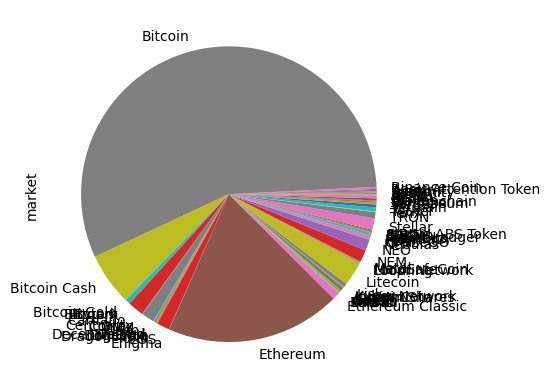

In [43]:
coins.groupby('name')['market'].sum().plot(kind='pie')

## 2. Визуализация

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [ ]:
#def plot_fancy_price_action(coins, symbol, starting, ending):
    #fig, ax = plt.subplots(figsize=(10, 10))
    #ax.plot(data.index, data['price'], color='blue', label=symbol)
    #ax.grid(True)
    #ax.set_xlabel('Дата')
    #ax.set_ylabel('Цена')
    #ax.set_title(f'Цена {symbol} в период с {starting} по {ending}')
    #x.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d'))
    #fig.autofmt_xdate()
    #ax.legend()
    #plt.show()


Посмотрим, что получилось:

In [ ]:
#plot_fancy_price_action(coins, 'VERI', '2013-06-01', '2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [ ]:
#def find_most_severe_pump_and_dump(coins, symbol, starting, ending):
    #TODO

In [ ]:
#find_most_severe_pump_and_dump(coins, 'BTC', '2017-06-01', '2018-06-01')

#### Сравните эти значения для разных монет.

In [ ]:
symbols = ['BTC', 'ETH']
starting = '2017-06-01'
ending = '2018-06-01'

results = pd.DataFrame(columns=['symbol', 'date', 'pnd'])
"""
for symbol in symbols:
    date, pnd = find_most_severe_pump_and_dump(coins, symbol, starting, ending)
    row = pd.DataFrame({'symbol': [symbol], 'date': [date], 'pnd': [pnd]}).dropna(axis=1, how='all')
    results = pd.concat([results.dropna(axis=1, how='all'), row], ignore_index=True)
"""
print(results)


Empty DataFrame
Columns: [symbol, date, pnd]
Index: []


## 4. Окупаемость инвестиций

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [ ]:
#def compute_roi(coins, investments, starting, ending):
    #TODO


In [ ]:
#compute_roi(coins, {'BTC': 1000, 'LTC': 500}, '2018-04-04', '2018-06-01')

In [ ]:
#compute_roi(coins, {'BTC': 1000, 'LTC': 500}, '2013-05-28', '2018-06-06')

## 5. Технический анализ

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
#def plot_bollinger_bands(coins, symbol, window, width):
    #TODO
    #plt.figure(figsize=(15,10))
    #plt.plot(coin_data.index, coin_data['price'], label=symbol)
    #plt.plot(coin_data.index, rolling_mean, label='Rolling Mean')
    #plt.plot(coin_data.index, bollinger_high, label='Bollinger High')
    #plt.plot(coin_data.index, bollinger_low, label='Bollinger Low')
    #plt.fill_between(coin_data.index, bollinger_high, bollinger_low, color='grey')
    #plt.title('Границы Боллинджера для {}'.format(symbol))
    #plt.xlabel('Дата')
    #plt.ylabel('Цена в $')
    #plt.legend(loc='best')
    #plt.grid(True)
    #plt.show()


In [ ]:
#plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

## 6. Капитализация как индикатор


Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, starting):
    mask = (coins.index >= starting)
    coins = coins.loc[mask]
    fig, axs = plt.subplots(2, figsize=(14,10))
    total_market_cap = coins['market'].groupby(coins.index).sum()

    for symbol in symbols:
        coin_data = coins[coins['symbol'] == symbol]
        coin_market_cap = coin_data['market']
        axs[0].plot(coin_market_cap.index, coin_market_cap, label=symbol)
        coin_market_share = coin_market_cap / total_market_cap
        axs[1].plot(coin_market_share.index, coin_market_share, label=symbol)

    for ax in axs:
        ax.legend(loc='best')
        ax.grid(True)

    #axs[0].set_title('Рыночная капитализация')
    #axs[0].set_ylabel('Рыночная капитализация в $')
    #axs[1].set_title('Рыночная доля')
    #axs[1].set_ylabel('Рыночная доля')

    #plt.xlabel('Дата')
    #plt.tight_layout()
    #plt.show()


In [ ]:
#plot_coins_capitalizations(coins, ('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'), '2017-07-01')

## 7. Корреляции монет

#### Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [ ]:
#def calc_coins_correlations(coins, date, symbols, window, alpha):
    #TODO


In [ ]:
#correlations = calc_coins_correlations(coins, date="2018-06-06", symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'], window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
#correlations.style.background_gradient(cmap='coolwarm').format("{:.2f}")

'''Method '.set_precision' is deprecated in the current Pandas release (v1.3.1). !!! Изменил условие задачи'''

"Method '.set_precision' is deprecated in the current Pandas release (v1.3.1). !!! Изменил условие задачи"

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
#correlations = calc_coins_correlations(coins, date="2017-12-27", symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'], window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
#correlations.style.background_gradient(cmap='coolwarm').format("{:.2f}")
